# Credit Score_ Predictive Models 

In [1]:
# import librairies
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import pickle 

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    classification_report,
)

from sklearn.model_selection import train_test_split, GridSearchCV


# 1.Charger le dataset

In [2]:
df= pd.read_csv("/Volumes/Ouiza/Dataset_csv_Projet_ Arteafact /train.csv")
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


# 2. Exploration de données 

In [3]:
df.shape

(100000, 28)

In [4]:
# Vérifier l'unicité de l'ID 
df.value_counts('ID')

ID
5634      1
105608    1
105642    1
105637    1
105636    1
         ..
55629     1
55628     1
55627     1
55626     1
155629    1
Name: count, Length: 100000, dtype: int64

In [5]:
# Décrire les variables numeriques 
df.describe()

,ID,Customer_ID,Month,Age,SSN,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,...,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,80631.500000,25982.666640,4.500000,33.316340,5.004617e+08,50505.123449,4197.270835,5.368820,5.533570,14.53208,...,21.08141,13.313120,10.470323,5.798250,1426.220376,32.285173,221.220460,107.699208,55.101315,392.697586
std,43301.486619,14340.543051,2.291299,10.764812,2.908267e+08,38299.422093,3186.432497,2.593314,2.067098,8.74133,...,14.80456,6.237166,6.609481,3.867826,1155.129026,5.116875,99.680716,132.267056,39.006932,201.652719
min,5634.000000,1006.000000,1.000000,14.000000,8.134900e+04,7005.930000,303.645417,0.000000,0.000000,1.00000,...,0.00000,0.000000,0.500000,0.000000,0.230000,20.000000,1.000000,0.000000,0.000000,0.007760
25%,43132.750000,13664.500000,2.750000,24.000000,2.451686e+08,19342.972500,1626.594167,3.000000,4.000000,7.00000,...,10.00000,9.000000,5.380000,3.000000,566.072500,28.052567,144.000000,29.268886,27.959111,267.615983
50%,80631.500000,25777.000000,4.500000,33.000000,5.006886e+08,36999.705000,3095.905000,5.000000,5.000000,13.00000,...,18.00000,14.000000,9.400000,5.000000,1166.155000,32.305784,219.000000,66.462304,45.156550,333.865366
75%,118130.250000,38385.000000,6.250000,42.000000,7.560027e+08,71683.470000,5957.715000,7.000000,7.000000,20.00000,...,28.00000,18.000000,14.850000,8.000000,1945.962500,36.496663,302.000000,147.392573,71.295797,463.215683
max,155629.000000,50999.000000,8.000000,56.000000,9.999934e+08,179987.280000,15204.633333,11.000000,11.000000,34.00000,...,62.00000,25.000000,29.980000,17.000000,4998.070000,50.000000,404.000000,1779.103254,434.191089,1183.930696


In [6]:
## decrire les variables categoriques 
df.describe(include='object') 

,Name,Occupation,Type_of_Loan,Credit_Mix,Payment_of_Min_Amount,Payment_Behaviour,Credit_Score
count,100000,100000,100000,100000,100000,100000,100000
unique,10128,15,6261,3,3,6,3
top,Jessicad,Lawyer,No Data,Standard,Yes,Low_spent_Small_value_payments,Standard
freq,48,7096,11408,45848,52326,28580,53174


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

In [8]:
# On a pas de valeurs nules 
df.isna().sum()

ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

In [9]:
# On regarde si on a des doublons 
df.duplicated().sum()

0

In [10]:
# Jeux de données non équilibré
df['Credit_Score'].value_counts()

Credit_Score
Standard    53174
Poor        28998
Good        17828
Name: count, dtype: int64

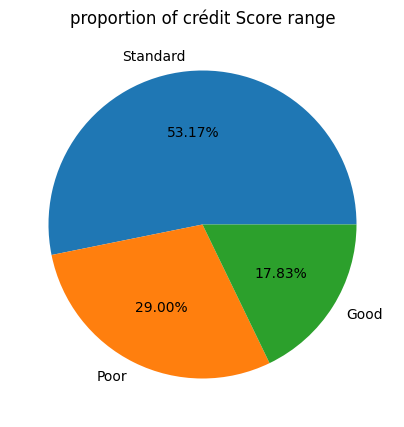

In [11]:
# les proportions de tranches credit score dans notre jeux de données 

cérdit_score_count= df['Credit_Score'].value_counts()

plt.figure(figsize=(5,5))

plt.pie(cérdit_score_count, labels=cérdit_score_count.index, autopct='%1.2f%%')

plt.title('proportion of crédit Score range')

plt.show()

##  Resample df with sklearn 

In [12]:
df_sample= resample(df, n_samples=10000, replace= False, random_state=0)

In [13]:
df_sample.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
3582,11004,7787,7,Michaelc,26.0,299960609.0,Manager,62846.31,5393.1925,9.0,...,Bad,4073.62,32.455597,27.0,Yes,284.982920,59.336416,High_spent_Medium_value_payments,321.855869,Poor
60498,96380,21488,3,Abrahamianu,26.0,73245469.0,Manager,44632.44,3419.3700,10.0,...,Bad,3409.13,39.326411,77.0,Yes,154.142311,46.861438,Low_spent_Small_value_payments,83.064506,Standard
53227,85473,45946,4,Shihf,41.0,590890942.0,Mechanic,28062.39,2397.5325,5.0,...,Good,839.85,36.592743,217.0,No,14.835135,20.765301,High_spent_Large_value_payments,443.050363,Poor
21333,37631,30410,6,Dianen,50.0,242452340.0,Mechanic,97010.16,8178.1800,1.0,...,Good,248.84,35.111520,363.0,NM,0.000000,98.722499,High_spent_Medium_value_payments,927.639770,Poor
3885,11459,10123,6,Lucia Mutikaniz,37.0,190831891.0,Musician,88406.34,7113.1950,2.0,...,Good,1273.15,25.823064,378.0,No,242.236850,90.482633,High_spent_Medium_value_payments,515.425785,Standard


In [14]:
df_sample.shape

(10000, 28)

In [15]:
# Enregistrer le dataset 
df_sample.to_csv('df_sample.csv', index=False)

In [15]:
df_sample['Credit_Score'].value_counts()

Credit_Score
Standard    5289
Poor        2911
Good        1800
Name: count, dtype: int64

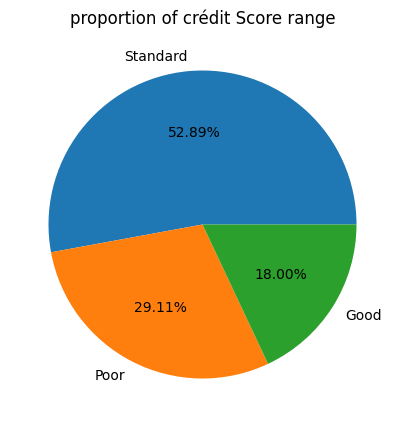

In [16]:
# les proportions de credit score dans notre jeux de données 

cérdit_score_count= df_sample['Credit_Score'].value_counts()

plt.figure(figsize=(5,5))

plt.pie(cérdit_score_count, labels=cérdit_score_count.index, autopct='%1.2f%%')

plt.title('proportion of crédit Score range')

plt.show()

### Note: Aprés avoir dimiué la taille de notre jeux de données avec Sklearn, on a gardé les memes proportions de  score du  crédit.

# 3. Visualisation 

In [17]:
numericals = df_sample.select_dtypes(include='number').columns
categoricals = df_sample.select_dtypes(exclude='number').columns

print('Numerical features: ', numericals)
print('Categorical features: ', categoricals)

Numerical features:  Index(['ID', 'Customer_ID', 'Month', 'Age', 'SSN', 'Annual_Income',
       'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly',
       'Monthly_Balance'],
      dtype='object')
Categorical features:  Index(['Name', 'Occupation', 'Type_of_Loan', 'Credit_Mix',
       'Payment_of_Min_Amount', 'Payment_Behaviour', 'Credit_Score'],
      dtype='object')


### Objectif: On regarde l'impact de chaque variable sur notre target; score de crédit.

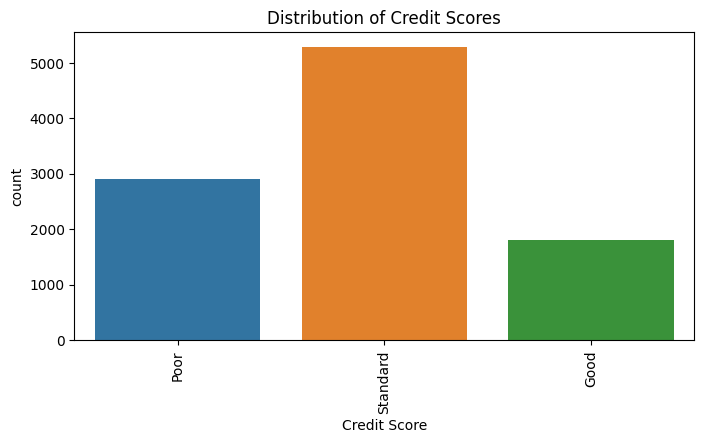

In [18]:
# Distributoion de la variable cible 

plt.figure(figsize=(8,4))

sns.countplot(data=df_sample, x='Credit_Score')
plt.xlabel('Credit Score')
plt.title('Distribution of Credit Scores')
plt.xticks(rotation=90)  

plt.show()


### Note: La majorité des clients ont un bon score de crédit.  

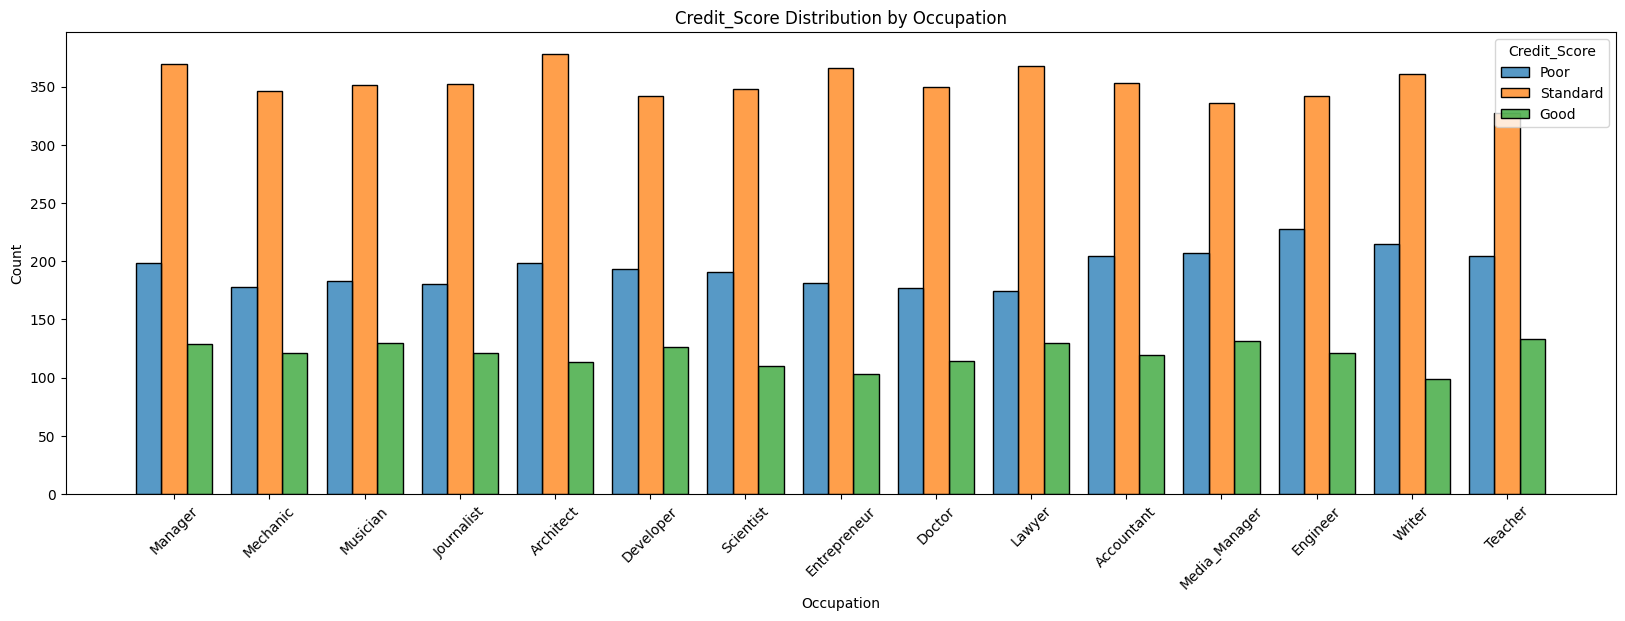

In [19]:
# Distribution de crédit score par rapport à l'occupation 

plt.figure(figsize=(20, 6))

sns.histplot(data=df_sample, x="Occupation", hue="Credit_Score", multiple="dodge",  shrink=.8)
plt.title("Credit_Score Distribution by Occupation")
plt.xlabel("Occupation")

plt.xticks(rotation=45) 
plt.show()

### Note: On remarque qu'il n'y'a pas trop l'influence de la profession exercée sur la cote de crédit 

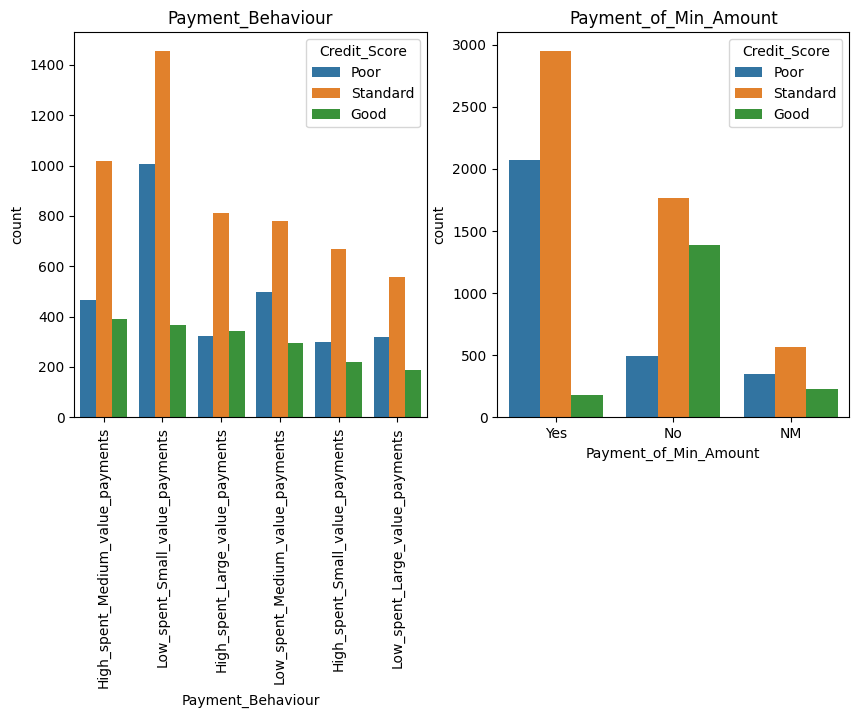

In [20]:
# Payment_Behaviour & Payment_of_Min_Amount

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.countplot(df_sample, x="Payment_Behaviour", hue="Credit_Score")
plt.xticks(rotation=90)
plt.title("Payment_Behaviour")


plt.subplot(1,2,2)
sns.countplot(df_sample, x="Payment_of_Min_Amount", hue="Credit_Score")
plt.title("Payment_of_Min_Amount")

plt.show()

#### Note:
#### Le comportement de paiment du client influence sur le score de credit.
#### La majorité de ceux qui ont effectué le payement minimum sur les préts ont un mauvais score de crédit par contre ceux qui ont effectué le payement normal sur les prets ont un trés bon score de crédit . 

<Axes: xlabel='Credit_Mix', ylabel='count'>

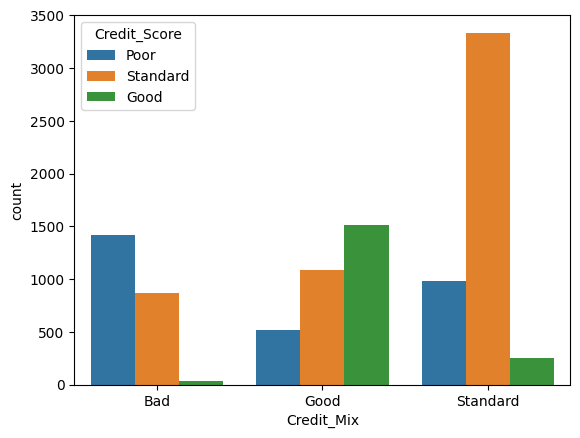

In [21]:
# Credit Mix 
sns.countplot(df_sample, x="Credit_Mix", hue="Credit_Score")

#### Note: 
#### Les clients qui ont un credit Mix Bad ont un mauvais score de credit.
#### Les clients qui ont un credit Mix Good ont un trés bon score de credit. 
#### Les clients qui ont un credit Mix Standard ont un bon score de credit. 

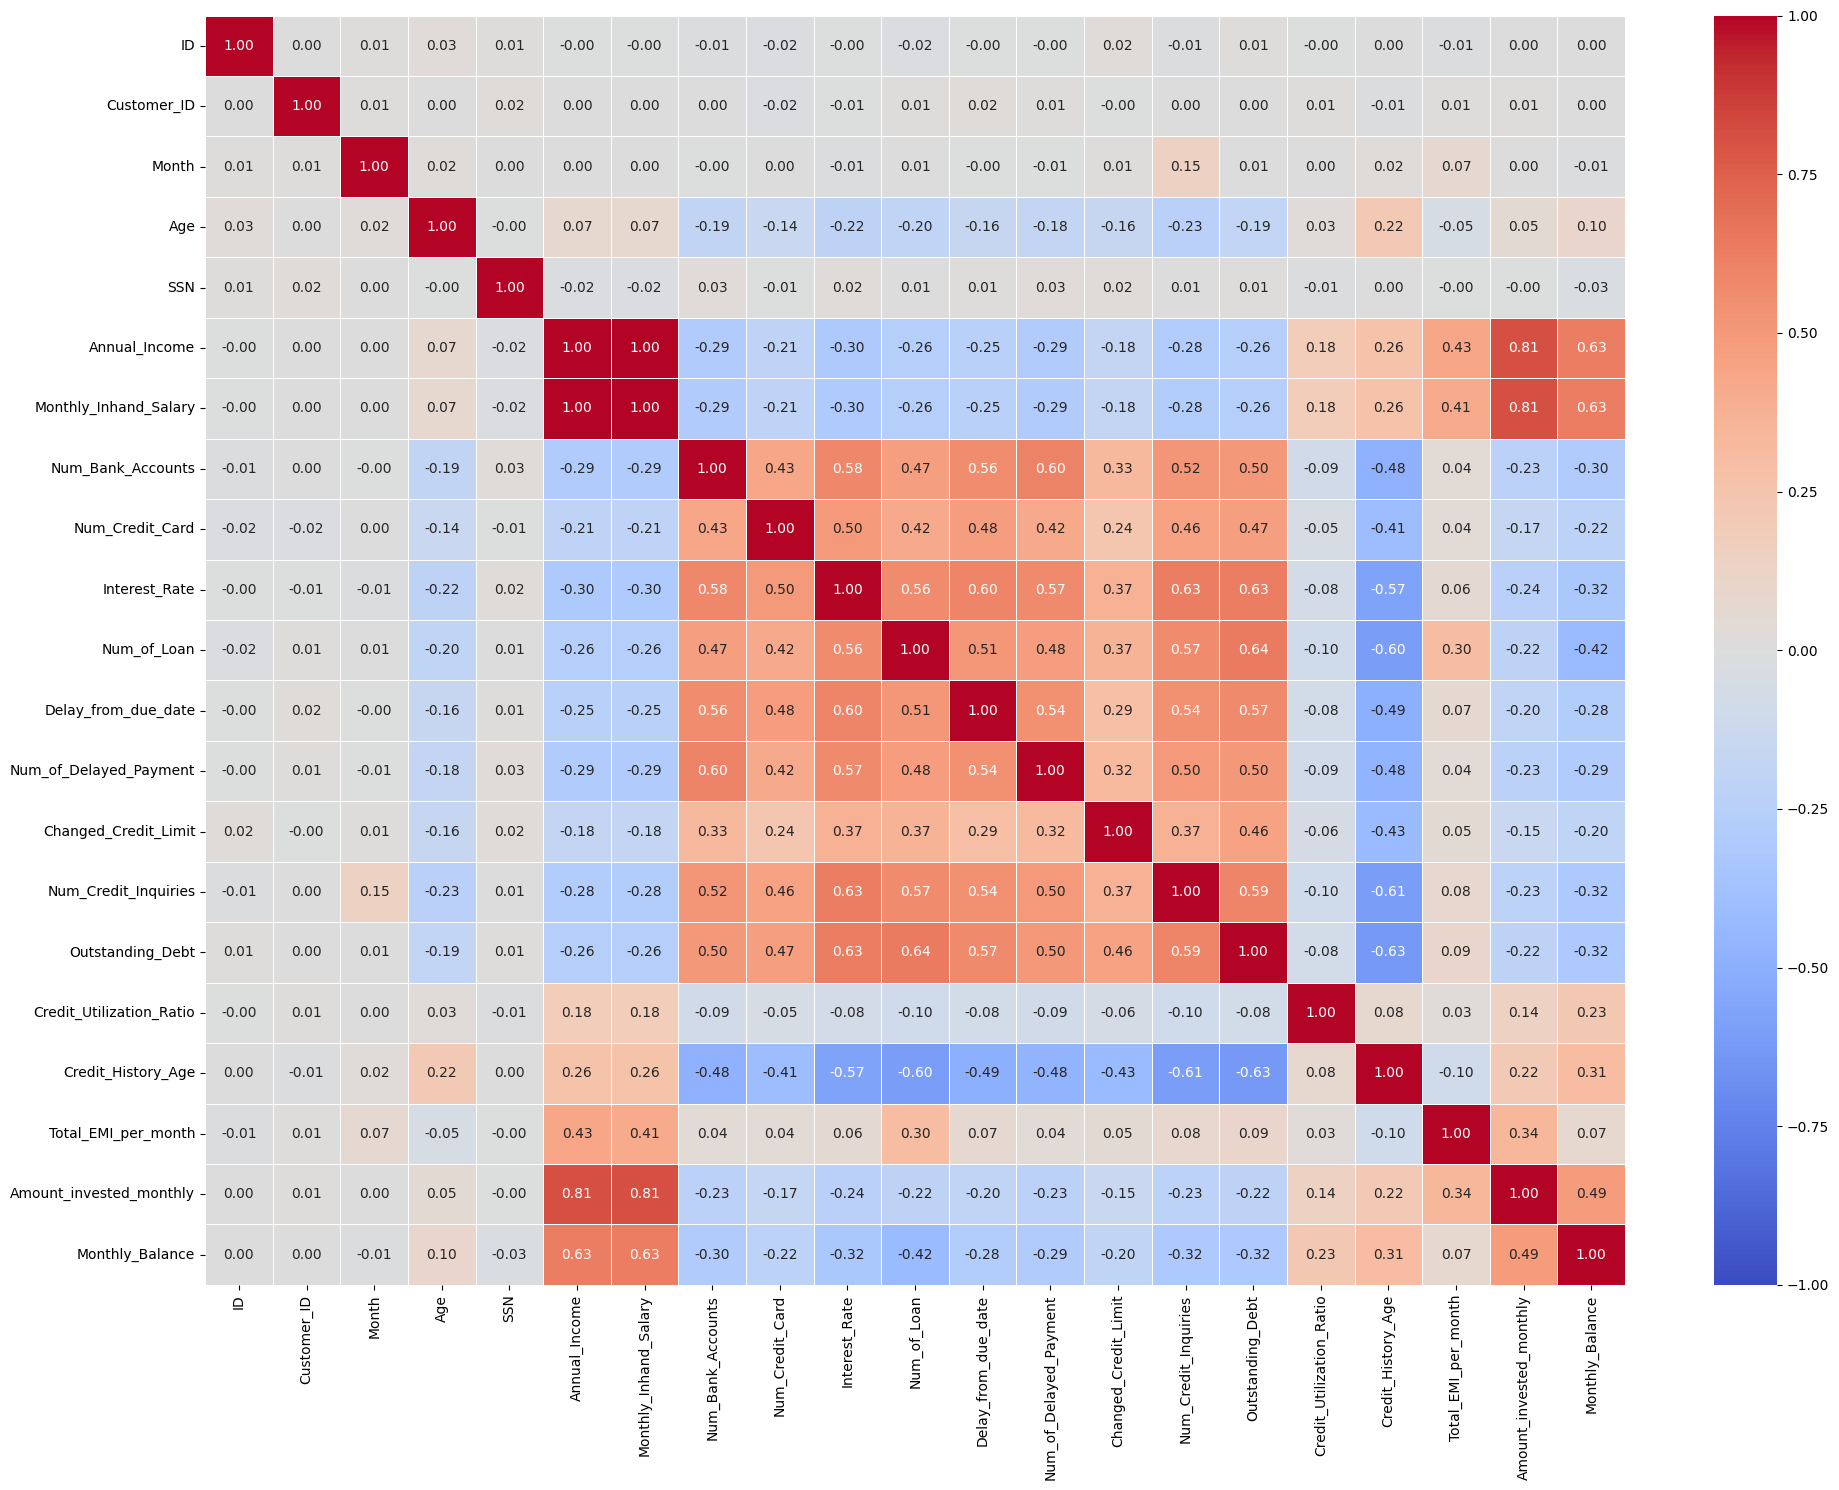

In [22]:
# La corrélation entre les variables numeriques 
corr_matrix = df_sample[numericals].corr()
plt.figure(figsize=(20,15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, vmin=-1, vmax=1)
plt.tight_layout()

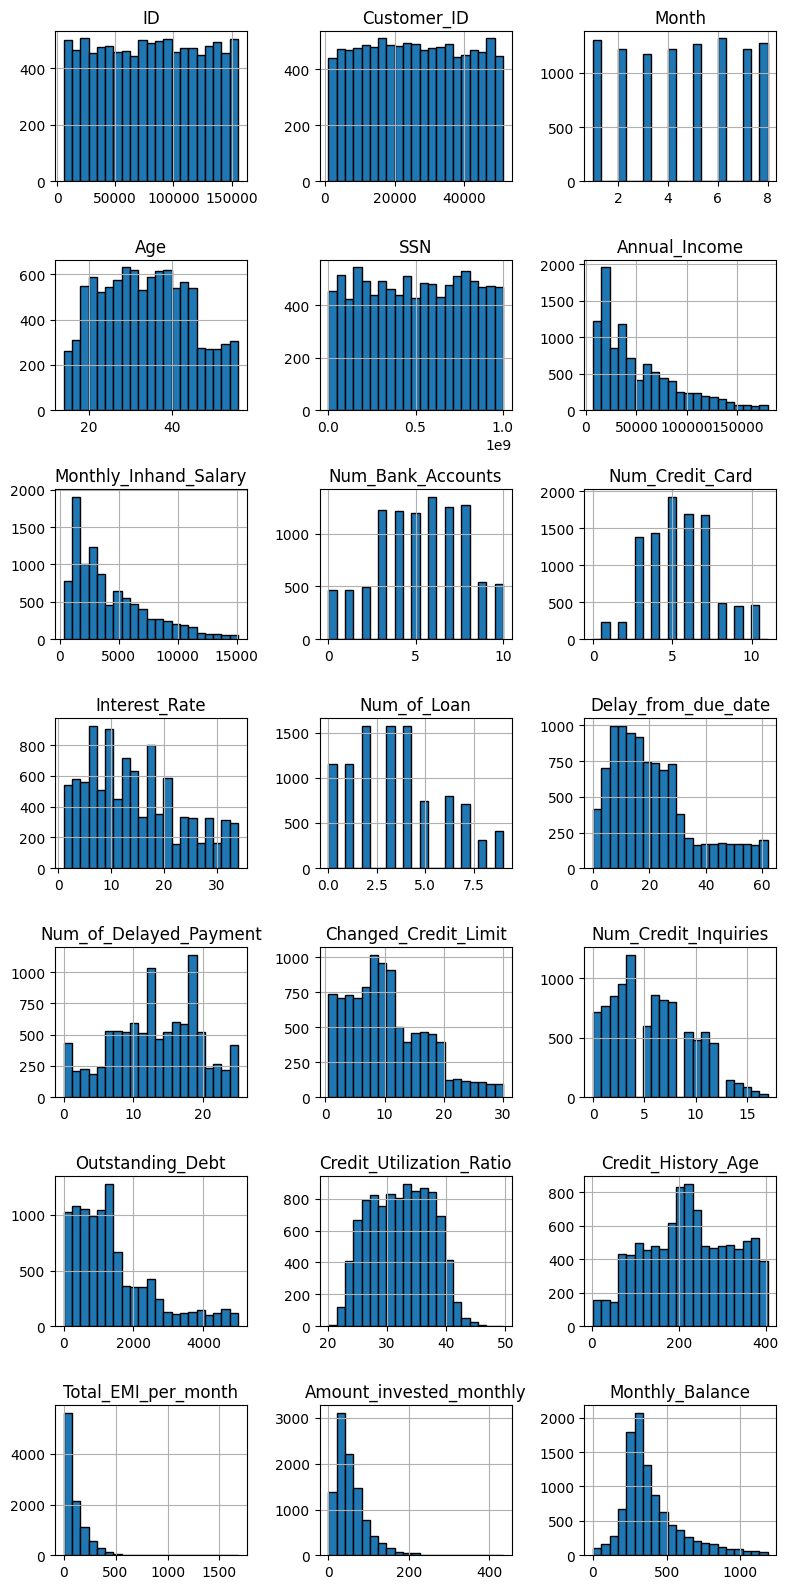

In [23]:
# La destribution de valeurs numériques dans notre jeux de données 
df_sample.hist(bins=21, figsize=(8,16), layout=(-1, 3), edgecolor="black")
plt.tight_layout()

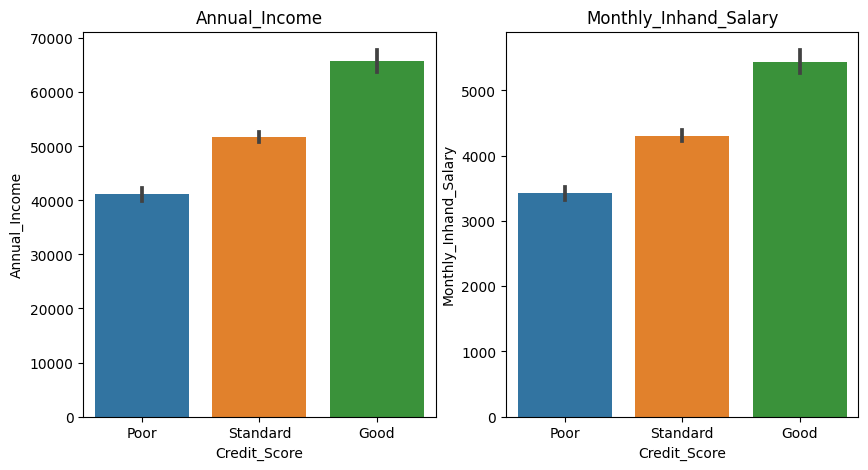

In [25]:
# Distribution de salaires mensuel et Annuel par rapportà la cote de crédit 
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.barplot(df_sample, x="Credit_Score", y="Annual_Income")
plt.title("Annual_Income")

plt.subplot(1,2,2)
sns.barplot(df_sample, x="Credit_Score", y="Monthly_Inhand_Salary")
plt.title("Monthly_Inhand_Salary")

plt.show()

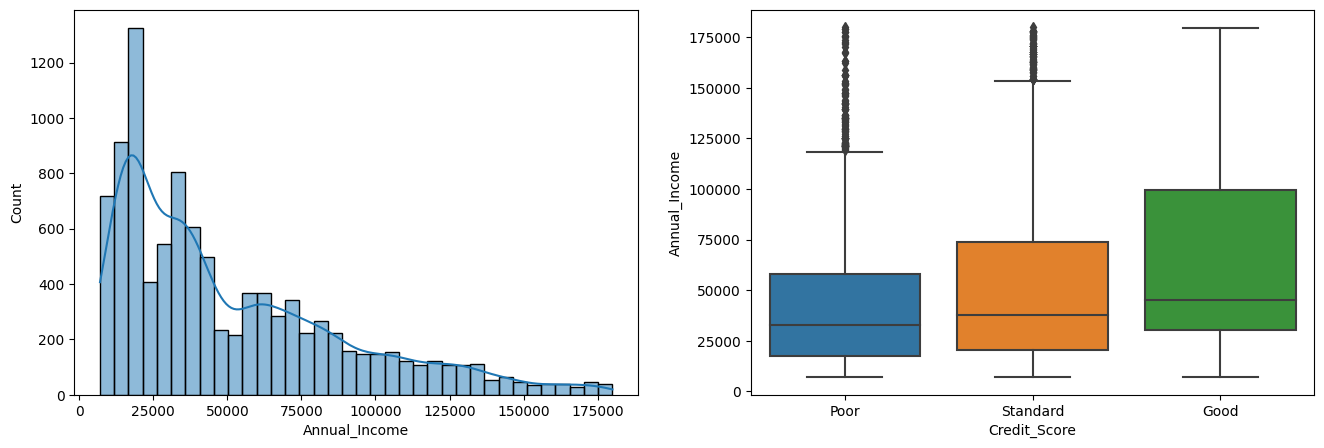

In [26]:
# La répartition de salaires annuel dans notre jeux de données
plt.figure(figsize=(16,5))

plt.subplot(121)
sns.histplot(df_sample['Annual_Income'], kde=True)

plt.subplot(122)
sns.boxplot(df_sample, x='Credit_Score', y='Annual_Income')

plt.show()

### Note: 
### Crédit Score Poor: 
#### 25% des gens qui touchent de revenus annuels plus élevées touchent 55000.
#### 25% des gens qui touchent de revenus annuels plus faibles touchent 20000.

### Crédit Score Standart: 
#### 25% des gens qui touchent de revenus annuels plus élevées touchent 75000.
#### 25% des gens qui touchent de revenus annuels plus faibles touchent 26000.

### Crédit Score Good: 
#### 25% des gens qui touchent de revenus annuels plus élevées touchent 100000.
#### 25% des gens qui touchent de revenus annuels plus faibles touchent 30000.

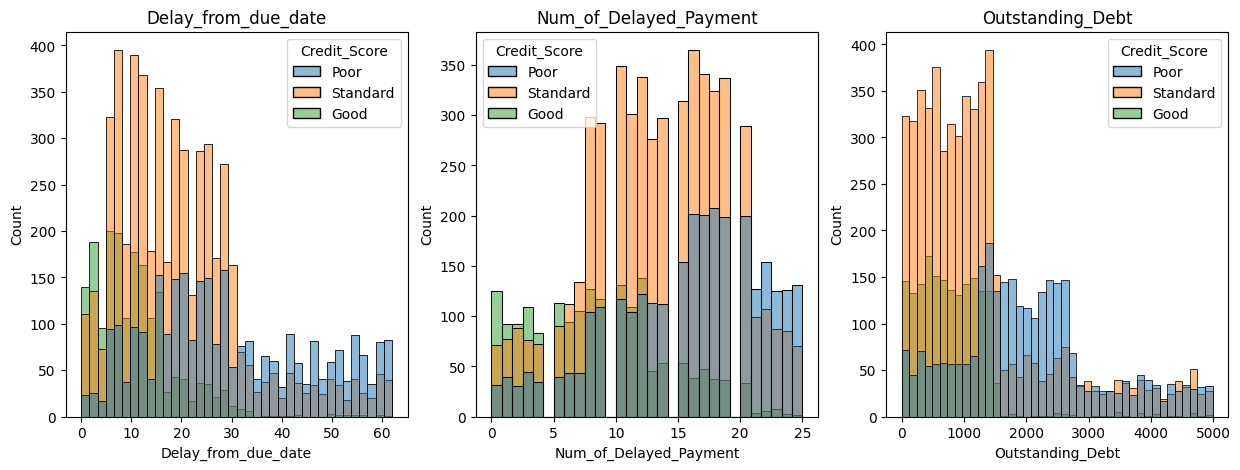

In [26]:
# Delay_from_due_date/Num_of_Delayed_Payment/Outstanding_Debt
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.histplot(df_sample, x="Delay_from_due_date", hue= "Credit_Score")
plt.title("Delay_from_due_date")

plt.subplot(1,3,2)
sns.histplot(df_sample, x= "Num_of_Delayed_Payment", hue="Credit_Score")
plt.title("Num_of_Delayed_Payment")

plt.subplot(1,3,3)
sns.histplot(df_sample, x= "Outstanding_Debt", hue="Credit_Score")
plt.title("Outstanding_Debt")

plt.show()

### Note: 
### Delay_from_due_date:  Plus le retard dans les paiments à partir de la date d'échéance est grand,  plus le client a un mauvais score Credit.
### Outstanding_Debt: Quand le montant de la dette impayée est grand, le client a  un mauvais score Credit.
### Num_of_Delayed_Payment: le nombre de paiment retardés ou manqués est grand le client a  un mauvais score Credit.
### l'inverse est vraie pour les 3 variables 

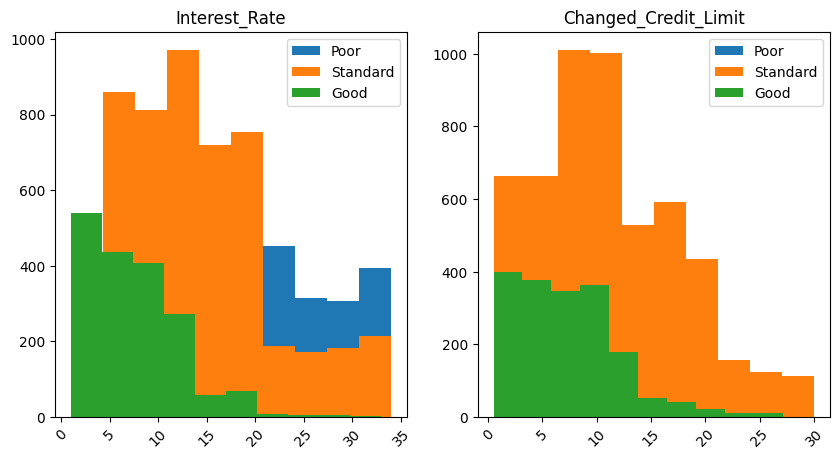

In [27]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.hist(df_sample[df_sample["Credit_Score"] == "Poor"]["Interest_Rate"])
plt.hist(df_sample[df_sample["Credit_Score"] == "Standard"]["Interest_Rate"])
plt.hist(df_sample[df_sample["Credit_Score"] == "Good"]["Interest_Rate"])
plt.xticks(rotation=45) 
plt.legend(["Poor", "Standard", "Good"])
plt.title("Interest_Rate")


plt.subplot(1,2,2)
plt.hist(df_sample[df_sample["Credit_Score"] == "Poor"]["Changed_Credit_Limit"])
plt.hist(df_sample[df_sample["Credit_Score"] == "Standard"]["Changed_Credit_Limit"])
plt.hist(df_sample[df_sample["Credit_Score"] == "Good"]["Changed_Credit_Limit"])
plt.xticks(rotation=45) 
plt.legend(["Poor", "Standard", "Good"])

plt.title("Changed_Credit_Limit")

plt.show()

### Les clients qui ont un grand taux d'interet ont un mauvais score de credit.
### Le changement dans la limite du crédit client influence sur le score de credit. 

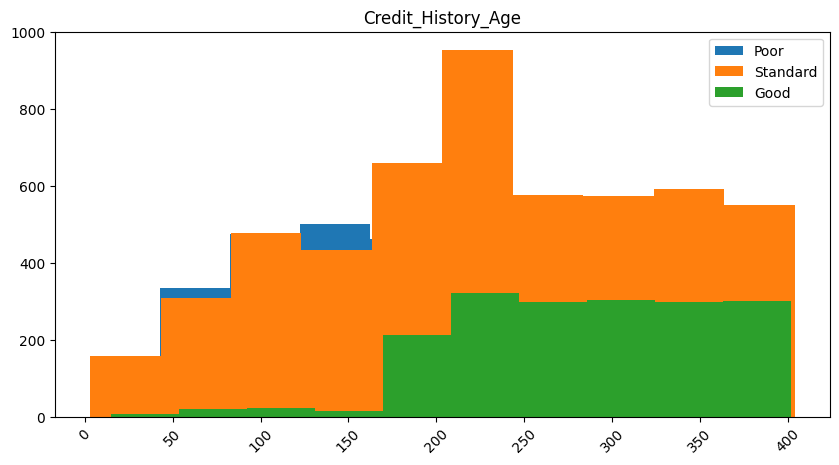

In [28]:
# Credit_History_Age

plt.figure(figsize=(10,5))

plt.hist(df_sample[df_sample["Credit_Score"] == "Poor"]["Credit_History_Age"])
plt.hist(df_sample[df_sample["Credit_Score"] == "Standard"]["Credit_History_Age"])
plt.hist(df_sample[df_sample["Credit_Score"] == "Good"]["Credit_History_Age"])
plt.xticks(rotation=45) 
plt.legend(["Poor", "Standard", "Good"])
plt.title("Credit_History_Age")

#sns.barplot(df_sample, x= "Credit_History_Age", y="Credit_Score")
#plt.title("Credit_History_Age")

plt.show()

### Note:
### Les clients qui ont plus de longueur hystorique de Crédit ont un trés bon score de credit.

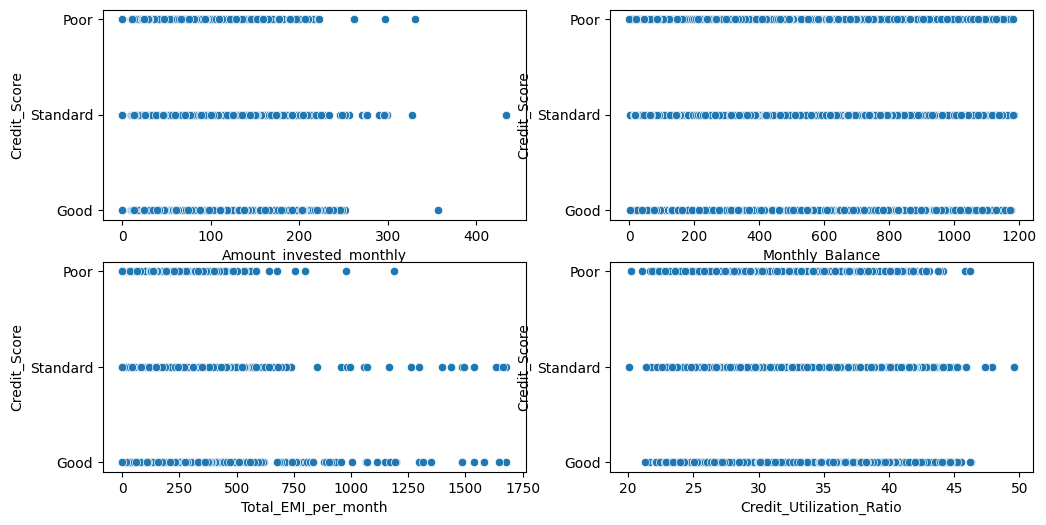

In [29]:
#Amount_invested_monthly/Monthly_Balance/Total_EMI_per_month/Credit_Utilization_Ratio
plt.figure(figsize=(12,6))

plt.subplot(2,2,1)
sns.scatterplot(x='Amount_invested_monthly',y= "Credit_Score", data=df_sample) 


plt.subplot(2,2,2)
sns.scatterplot(x='Monthly_Balance',y= "Credit_Score", data=df_sample) 


plt.subplot(2,2,3)
sns.scatterplot(x='Total_EMI_per_month',y= "Credit_Score", data=df_sample) 


plt.subplot(2,2,4)
sns.scatterplot(x='Credit_Utilization_Ratio',y= "Credit_Score", data=df_sample) 


plt.show()

### Note
### Les variables Amount_invested_monthly, Monthly_Balance,Credit_Utilization_Ratio n'influencent pas vraiment sur le score credit, contrairement à la vrariable  Total_EMI_per_month(le total de mensualités équivalentes payéses par le client ).

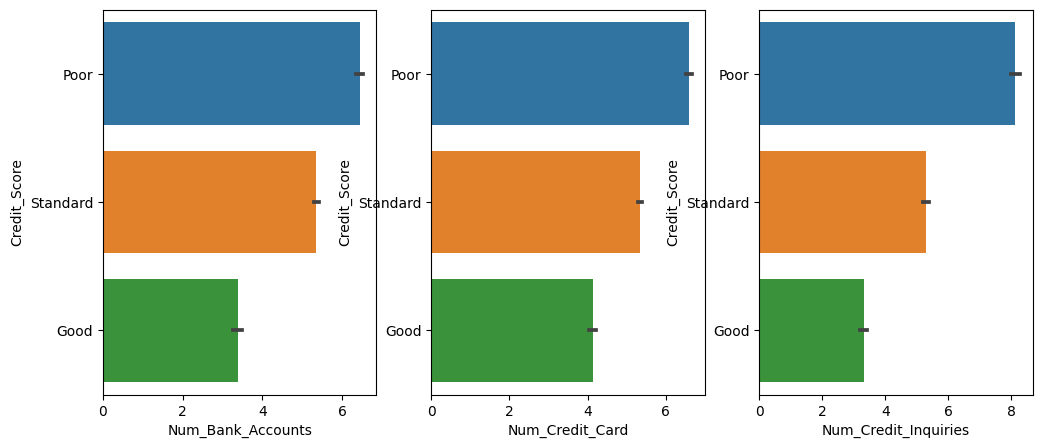

In [31]:
# Num_Bank_Accounts/ Num_Credit_Card/Num_Credit_Inquiries

plt.figure(figsize=(12,5))

plt.subplot(1,3,1)
sns.barplot(data=df_sample, x="Num_Bank_Accounts", y="Credit_Score")

plt.subplot(1,3,2)
sns.barplot(data=df_sample, x="Num_Credit_Card", y="Credit_Score")

plt.subplot(1,3,3)
sns.barplot(data=df_sample, x="Num_Credit_Inquiries", y="Credit_Score")

plt.show()

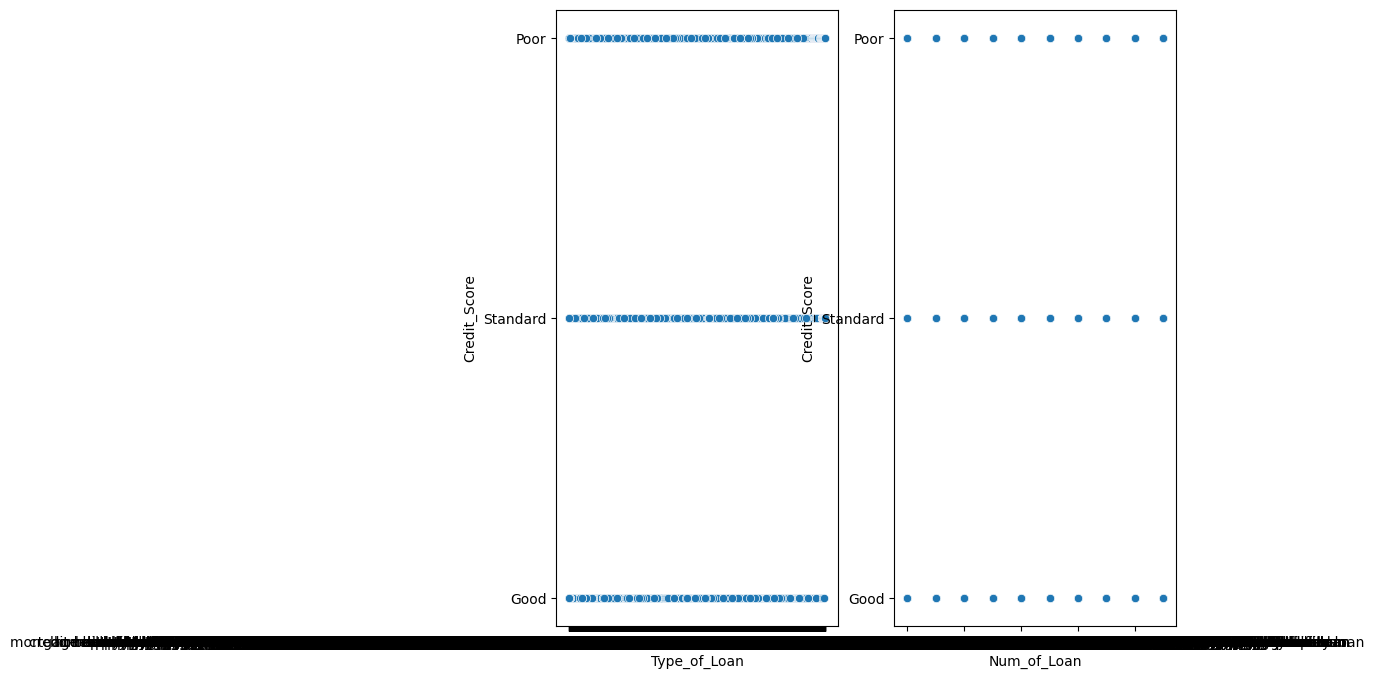

In [30]:
plt.figure(figsize=(8,8))

plt.subplot(1,2,1)

sns.scatterplot(x='Type_of_Loan',y= "Credit_Score", data=df_sample) 

plt.subplot(1,2,2)
sns.scatterplot(x='Num_of_Loan',y= "Credit_Score", data=df_sample) 

plt.show()


#### Note: 
#### On voit pas trop l'influence de type du ou des prets sur la tranche de Credit Score 

Text(0.5, 1.0, 'Num_of_Loan vs Outstanding_Debt')

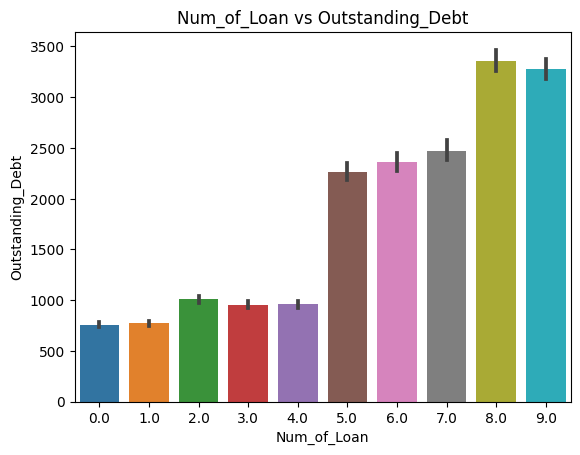

In [32]:
# Num_of_Loan vs Outstanding_Debt
sns.barplot(df_sample, x="Num_of_Loan", y="Outstanding_Debt")
plt.title("Num_of_Loan vs Outstanding_Debt")

### Note: 
### Plus le nombre de credit est grand plus le client a des dettes impayées.

# 3. Préparation de données 

## 3.1Droper des colonnes que je suppose inutiles 

In [32]:
df_sample = df_sample.drop(['ID','Customer_ID','Month','Name','SSN','Credit_Utilization_Ratio','Occupation'], axis=1)

In [33]:
df_sample['Credit_Score'].value_counts()

Credit_Score
Standard    5289
Poor        2911
Good        1800
Name: count, dtype: int64

In [34]:
df_sample['Credit_Mix'].value_counts()

Credit_Mix
Standard    4572
Good        3115
Bad         2313
Name: count, dtype: int64

In [35]:
df_sample['Payment_of_Min_Amount'].value_counts()

Payment_of_Min_Amount
Yes    5204
No     3650
NM     1146
Name: count, dtype: int64

In [36]:
df_sample['Credit_Score'] = df_sample['Credit_Score'].map({'Poor': 0 , 'Standard': 1, 'Good': 2})

In [37]:
df_sample['Credit_Mix'] = df_sample['Credit_Mix'].map({'Bad': 0 , 'Standard': 1, 'Good': 2})

In [38]:
df_sample['Payment_of_Min_Amount'] = df_sample['Payment_of_Min_Amount'].map({'No': 0 , 'Yes': 1, 'NM': 2})

## 3.2 dummies

In [39]:
df_sample['Payment_Behaviour'].value_counts()

Payment_Behaviour
Low_spent_Small_value_payments      2827
High_spent_Medium_value_payments    1874
Low_spent_Medium_value_payments     1574
High_spent_Large_value_payments     1474
High_spent_Small_value_payments     1189
Low_spent_Large_value_payments      1062
Name: count, dtype: int64

In [40]:
df_sample['Type_of_Loan'].value_counts()

Type_of_Loan
No Data                                                                                                   1154
credit-builder loan                                                                                        143
not specified                                                                                              143
debt consolidation loan                                                                                    142
payday loan                                                                                                139
                                                                                                          ... 
mortgage loan,not specified,mortgage loan                                                                    1
personal loan,personal loan,debt consolidation loan,not specified,debt consolidation loan,student loan       1
payday loan,home equity loan,debt consolidation loan,debt consolidation loan,mortgage loan         

In [41]:
mask = ~(df_sample['Type_of_Loan'].isin(['No Data', 'credit-builder loan', 'not specified', 'debt consolidation loan','payday loan','mortgage loan','personal loan','student loan', 'home equity loan', 'auto loan']))
mask

3582      True
60498     True
53227    False
21333    False
3885      True
         ...  
89555     True
88135    False
51888     True
51380     True
67294     True
Name: Type_of_Loan, Length: 10000, dtype: bool

In [42]:
df_sample.loc[mask,'Type_of_Loan'] = 'Others'

In [43]:
df_sample['Type_of_Loan'].value_counts()

Type_of_Loan
Others                     7689
No Data                    1154
credit-builder loan         143
not specified               143
debt consolidation loan     142
payday loan                 139
mortgage loan               137
student loan                119
personal loan               119
home equity loan            111
auto loan                   104
Name: count, dtype: int64

In [44]:
df_sample= pd.get_dummies(data= df_sample,columns = ['Type_of_Loan', 'Payment_Behaviour'], dtype = int)

In [45]:
df_sample.shape

(10000, 36)

In [46]:
# Enregistrer le dataset preprocessed
df_sample.to_csv('df_preprocessed.csv', index=False)

# 4. Modelisation

In [47]:
X= df_sample.drop(['Credit_Score'],axis = 1)
y=df_sample['Credit_Score']

In [48]:
X.shape

(10000, 35)

## Data split

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=0)

In [50]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8000, 35), (2000, 35), (8000,), (2000,))

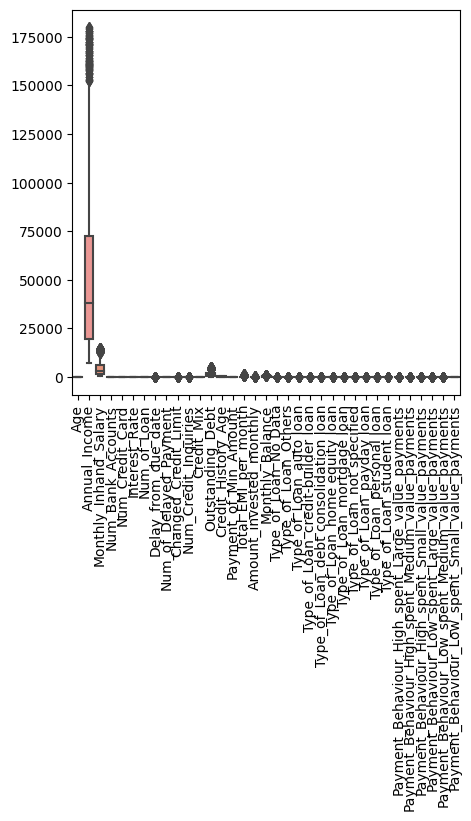

In [51]:
plt.figure(figsize=(5,5))
sns.boxplot(X_train)
plt.xticks(rotation=90)
plt.show()

## Data scaling

In [52]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test= scaler.fit_transform(X_test)

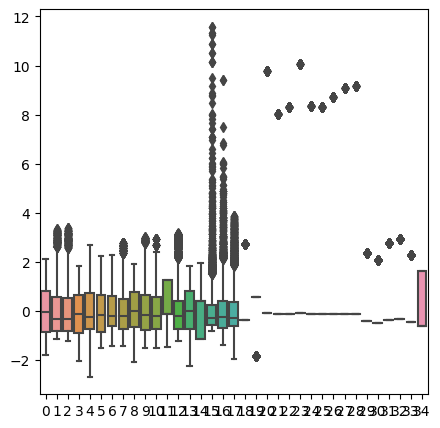

In [53]:
plt.figure(figsize=(5,5))
sns.boxplot(X_train)
plt.show()

# 

In [54]:
# Simples models 

models =   {
       "logistic_regregression": LogisticRegression(),
    
       "SVC ":SVC (),
    
       "RandomForestClassifier": RandomForestClassifier(),
    
       "GradientBoostingClassifier": GradientBoostingClassifier(),
        
       "AdaBoostClassifier": AdaBoostClassifier(),
        
       "XGBClassifier": XGBClassifier(),
    
       "KNeighborsClassifier": KNeighborsClassifier()
    }


In [55]:
# la fonction de precison 
def score(y_test, y_pred, retu= False):
    
    f1_score_test= f1_score(y_test,y_pred, average= 'micro')
  
    if retu: 
        return f1_score_test

    else: 
        print(f'la précision du modéle test est:{f1_score_test}')
        print("Classification report sur le test : \n", classification_report(y_test, y_pred))
        

In [56]:
# la fonction d'application des models 

def train_test_eval(models,X_train, X_test, y_train, y_test):
    
    for name, model in models.items(): 
        print(name, ':')
        model.fit(X_train, y_train)
        
        score(y_test, model.predict(X_test))
        conf_mat= confusion_matrix(y_test,model.predict(X_test) )

        plt.figure(figsize=(5, 4))

        sns.heatmap(conf_mat, annot=True, cmap='Blues')

        plt.show()
        print('\n----------------------------\n')
           

logistic_regregression :
la précision du modéle test est:0.6735
Classification report sur le test : 
               precision    recall  f1-score   support

           0       0.67      0.56      0.61       566
           1       0.70      0.74      0.72      1078
           2       0.58      0.63      0.61       356

    accuracy                           0.67      2000
   macro avg       0.65      0.65      0.65      2000
weighted avg       0.67      0.67      0.67      2000



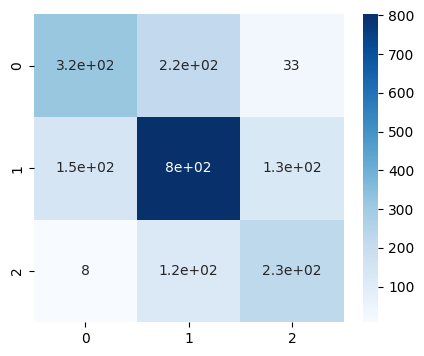


----------------------------

SVC  :
la précision du modéle test est:0.6875
Classification report sur le test : 
               precision    recall  f1-score   support

           0       0.70      0.63      0.66       566
           1       0.73      0.74      0.73      1078
           2       0.56      0.63      0.59       356

    accuracy                           0.69      2000
   macro avg       0.66      0.67      0.66      2000
weighted avg       0.69      0.69      0.69      2000



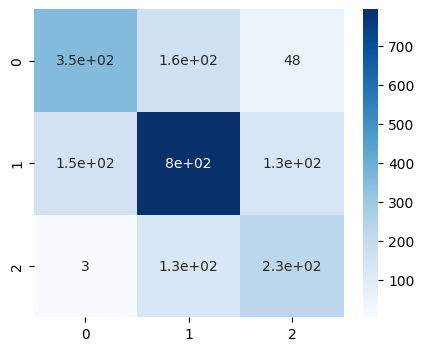


----------------------------

RandomForestClassifier :
la précision du modéle test est:0.75
Classification report sur le test : 
               precision    recall  f1-score   support

           0       0.74      0.74      0.74       566
           1       0.79      0.78      0.78      1078
           2       0.67      0.69      0.68       356

    accuracy                           0.75      2000
   macro avg       0.73      0.73      0.73      2000
weighted avg       0.75      0.75      0.75      2000



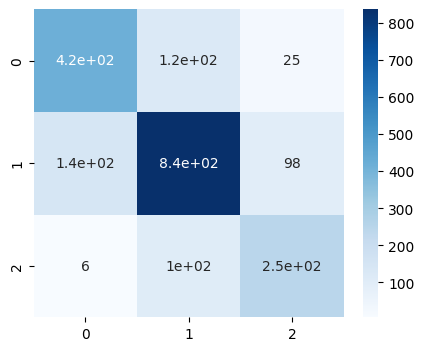


----------------------------

GradientBoostingClassifier :
la précision du modéle test est:0.7185
Classification report sur le test : 
               precision    recall  f1-score   support

           0       0.71      0.71      0.71       566
           1       0.76      0.75      0.76      1078
           2       0.60      0.64      0.62       356

    accuracy                           0.72      2000
   macro avg       0.69      0.70      0.70      2000
weighted avg       0.72      0.72      0.72      2000



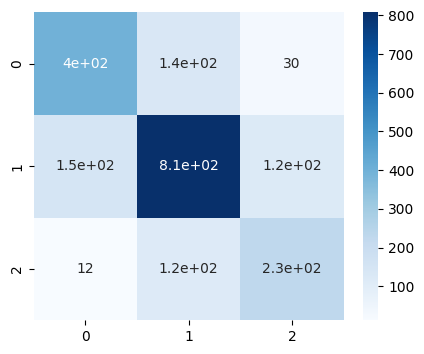


----------------------------

AdaBoostClassifier :
la précision du modéle test est:0.6875
Classification report sur le test : 
               precision    recall  f1-score   support

           0       0.66      0.65      0.66       566
           1       0.72      0.74      0.73      1078
           2       0.61      0.58      0.60       356

    accuracy                           0.69      2000
   macro avg       0.67      0.66      0.66      2000
weighted avg       0.69      0.69      0.69      2000



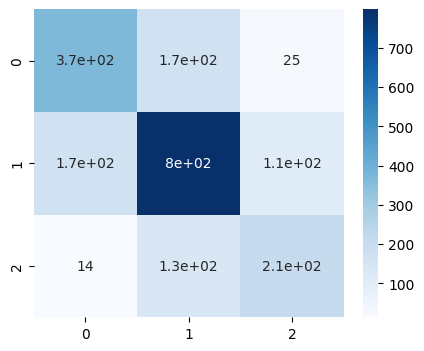


----------------------------

XGBClassifier :
la précision du modéle test est:0.722
Classification report sur le test : 
               precision    recall  f1-score   support

           0       0.72      0.68      0.70       566
           1       0.76      0.77      0.76      1078
           2       0.63      0.65      0.64       356

    accuracy                           0.72      2000
   macro avg       0.70      0.70      0.70      2000
weighted avg       0.72      0.72      0.72      2000



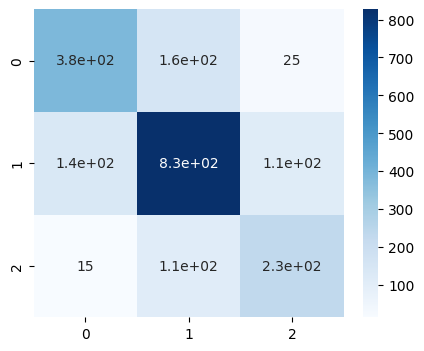


----------------------------

KNeighborsClassifier :
la précision du modéle test est:0.6435
Classification report sur le test : 
               precision    recall  f1-score   support

           0       0.61      0.60      0.60       566
           1       0.68      0.75      0.72      1078
           2       0.53      0.39      0.45       356

    accuracy                           0.64      2000
   macro avg       0.61      0.58      0.59      2000
weighted avg       0.64      0.64      0.64      2000



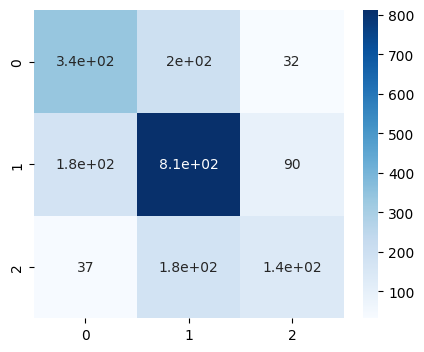


----------------------------



In [57]:
train_test_eval(models,X_train, X_test, y_train, y_test)        
    

# Hyperparameter optimization

## Random Forest

In [34]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

#GridSearchCV(estimator, param_grid, scoring=None, fit_params=None, n_jobs=None, iid=’warn’, refit=True, cv=’warn’, verbose=0, pre_dispatch=‘2*n_jobs’, error_score=’raise-deprecating’, return_train_score=’warn’)

tuned_parameters = [{'max_depth': [5, 10, 20, 30, None], 'n_estimators': [10, 30, 50], 'criterion':['gini', 'entropy'],
                     'class_weight': ['balanced', 'balanced_subsample', None]}]

clf = GridSearchCV(RandomForestClassifier(n_jobs=-1, random_state=42), tuned_parameters, cv=5, scoring='f1')
clf.fit(X_train, y_train)

/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in

/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in

/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in

/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in

/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in

/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in

/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in

/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in

/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in

/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in

/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in

/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in

/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in

/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in

/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in

/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in

/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in

/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in

/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in

/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in

/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in

/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in

/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in

/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in

/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in

/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in

/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in

/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in

/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in

/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in

/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in

/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in

/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in

/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in

/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in

/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in

/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in

/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in

/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in

/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in

/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in

/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in

/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in

/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in

/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in

/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in

/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in

/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in

/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in

/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in

/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in

/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in

/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in

/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in

/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in

/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in

/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in

/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in

/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in

/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in

/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in

/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in

/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in

/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in

/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in

/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in

/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in

/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in

/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in

/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in

/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in

/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in

/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in

/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in

/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in

/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in

/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             param_grid=[{'class_weight': ['balanced', 'balanced_subsample',
                                           None],
                          'criterion': ['gini', 'entropy'],
                          'max_depth': [5, 10, 20, 30, None],
                          'n_estimators': [10, 30, 50]}],
             scoring='f1')

In [35]:
y_pred= clf.predict(X_test)
y_pred_train= clf.predict(X_train)

In [36]:
clf.best_estimator_

RandomForestClassifier(class_weight='balanced', max_depth=5, n_estimators=10,
                       n_jobs=-1, random_state=42)

In [37]:
print("f1 score sur le train : ", f1_score(y_train, y_pred_train, average='micro'))
print("f1 score sur le test : ", f1_score(y_test, y_pred, average='micro'))
print('\n----------------------------\n')
print("Classification report sur le test : \n", classification_report(y_test, y_pred))

f1 score sur le train :  0.6685
f1 score sur le test :  0.69

----------------------------

Classification report sur le test : 
               precision    recall  f1-score   support

           0       0.64      0.76      0.70       566
           1       0.87      0.60      0.71      1078
           2       0.52      0.86      0.65       356

    accuracy                           0.69      2000
   macro avg       0.68      0.74      0.68      2000
weighted avg       0.74      0.69      0.69      2000



# XGB 

In [38]:
tuned_parameters = [{'max_depth': [10, 100, 1000], 'n_estimators': [10, 30, 100], 'learning_rate': [0.01, 0.1],
                     'subsample':[1, 0.9, 0.8]}]

clf = GridSearchCV(XGBClassifier(), tuned_parameters, cv=5, scoring='f1')
clf.fit(X_train, y_train)

/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in

/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in

/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in

/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in

/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in

/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in

/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in

/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in

/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in

/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in

/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in

/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in

/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in

/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in

/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in

/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in

/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in

/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in

/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in

/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in

/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in

/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in

/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in

/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in

/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in

/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in

/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in

/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in

/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in

/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in

/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in

/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in

/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in

/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in

/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in

/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in

/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in

/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in

/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in

/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in

/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in

/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in

/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in

/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in

/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in

/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in

/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in

/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in

/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in

/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in

/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in

/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in

/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid=[{'learning_rate': [0.01, 0.1],
                          'max_depth': [10, 100, 1000],
                          'n_estimators': [10, 30, 100],
                          'subsample': [1, 0.9, 0.8]}],
             scoring='f1')

In [39]:
clf.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=10, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [40]:
print("f1 score sur le train : ", f1_score(y_train, y_pred_train, average='micro'))
print("f1 score sur le test : ", f1_score(y_test, y_pred, average='micro'))
print('\n----------------------------\n')
print("Classification report sur le test : \n", classification_report(y_test, y_pred))

f1 score sur le train :  0.6685
f1 score sur le test :  0.69

----------------------------

Classification report sur le test : 
               precision    recall  f1-score   support

           0       0.64      0.76      0.70       566
           1       0.87      0.60      0.71      1078
           2       0.52      0.86      0.65       356

    accuracy                           0.69      2000
   macro avg       0.68      0.74      0.68      2000
weighted avg       0.74      0.69      0.69      2000



### Note: J'ai testé Random Forest et XGB avec les hyperparamétre pour améliorer le score, mais ça ne l'a pas amélioreé :(

## Adding Smote 

In [58]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

In [59]:
# la fonction d'application des models avec smote  

def train_test_eval_smote(models,X_train, X_test, y_train, y_test):
    
    for name, model in models.items(): 
        print(name, ':')
        model.fit(X_res, y_res)
        
        score(y_test, model.predict(X_test))
        conf_mat= confusion_matrix(y_test,model.predict(X_test) )

        plt.figure(figsize=(5, 4))

        sns.heatmap(conf_mat, annot=True, cmap='Blues')

        plt.show()
        print('\n----------------------------\n')
           

logistic_regregression :
la précision du modéle test est:0.675
Classification report sur le test : 
               precision    recall  f1-score   support

           0       0.63      0.69      0.66       566
           1       0.82      0.61      0.70      1078
           2       0.52      0.87      0.65       356

    accuracy                           0.68      2000
   macro avg       0.66      0.72      0.67      2000
weighted avg       0.72      0.68      0.68      2000



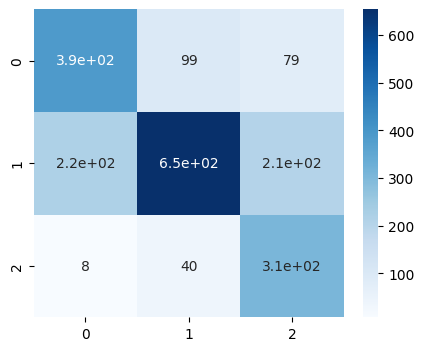


----------------------------

SVC  :
la précision du modéle test est:0.6935
Classification report sur le test : 
               precision    recall  f1-score   support

           0       0.63      0.78      0.70       566
           1       0.86      0.60      0.71      1078
           2       0.54      0.84      0.66       356

    accuracy                           0.69      2000
   macro avg       0.68      0.74      0.69      2000
weighted avg       0.74      0.69      0.70      2000



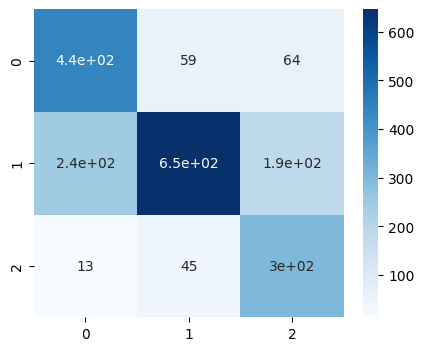


----------------------------

RandomForestClassifier :
la précision du modéle test est:0.5315
Classification report sur le test : 
               precision    recall  f1-score   support

           0       0.63      0.82      0.71       566
           1       0.83      0.26      0.40      1078
           2       0.34      0.89      0.49       356

    accuracy                           0.53      2000
   macro avg       0.60      0.66      0.54      2000
weighted avg       0.69      0.53      0.50      2000



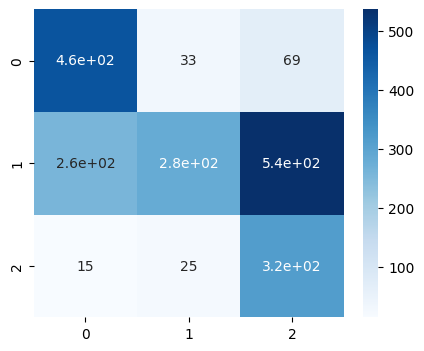


----------------------------

GradientBoostingClassifier :
la précision du modéle test est:0.402
Classification report sur le test : 
               precision    recall  f1-score   support

           0       0.59      0.83      0.68       566
           1       0.50      0.00      0.00      1078
           2       0.28      0.94      0.43       356

    accuracy                           0.40      2000
   macro avg       0.46      0.59      0.37      2000
weighted avg       0.48      0.40      0.27      2000



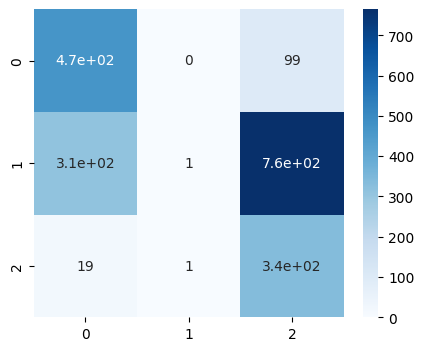


----------------------------

AdaBoostClassifier :
la précision du modéle test est:0.395
Classification report sur le test : 
               precision    recall  f1-score   support

           0       0.64      0.74      0.69       566
           1       0.60      0.02      0.04      1078
           2       0.27      0.97      0.42       356

    accuracy                           0.40      2000
   macro avg       0.50      0.58      0.38      2000
weighted avg       0.55      0.40      0.29      2000



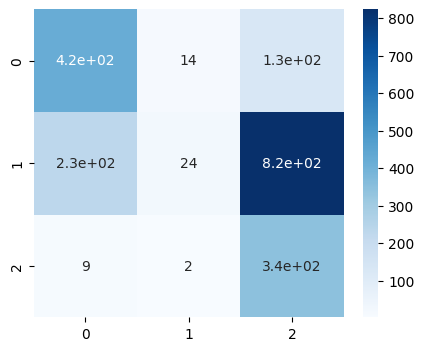


----------------------------

XGBClassifier :
la précision du modéle test est:0.549
Classification report sur le test : 
               precision    recall  f1-score   support

           0       0.55      0.85      0.67       566
           1       0.87      0.28      0.42      1078
           2       0.40      0.90      0.56       356

    accuracy                           0.55      2000
   macro avg       0.61      0.67      0.55      2000
weighted avg       0.70      0.55      0.52      2000



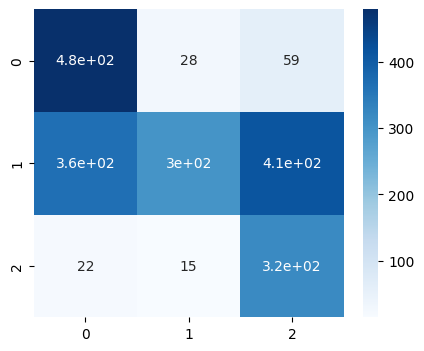


----------------------------

KNeighborsClassifier :
la précision du modéle test est:0.5875
Classification report sur le test : 
               precision    recall  f1-score   support

           0       0.55      0.70      0.62       566
           1       0.75      0.50      0.60      1078
           2       0.43      0.68      0.52       356

    accuracy                           0.59      2000
   macro avg       0.58      0.63      0.58      2000
weighted avg       0.64      0.59      0.59      2000



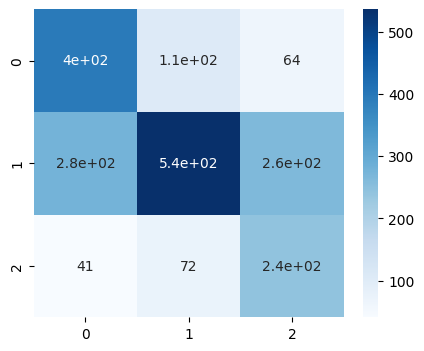


----------------------------



In [60]:
train_test_eval_smote(models,X_train, X_test, y_train, y_test)

### Note: 
###  Avec le smote, je n'ai pas amélioré le score de crédit.  

# 4. Application 

## Choisisr quelques features importante

In [100]:
X_2= X[['Annual_Income','Outstanding_Debt', 'Credit_Mix','Payment_of_Min_Amount', 'Interest_Rate', 'Credit_History_Age','Num_of_Loan','Num_Credit_Card']]

In [101]:
X_2

,Annual_Income,Outstanding_Debt,Credit_Mix,Payment_of_Min_Amount,Interest_Rate,Credit_History_Age,Num_of_Loan,Num_Credit_Card
3582,62846.31,4073.62,0,1,20.0,27.0,7.0,8.0
60498,44632.44,3409.13,0,1,33.0,77.0,5.0,6.0
53227,28062.39,839.85,2,0,7.0,217.0,1.0,5.0
21333,97010.16,248.84,2,2,3.0,363.0,0.0,7.0
3885,88406.34,1273.15,2,0,12.0,378.0,4.0,7.0
...,...,...,...,...,...,...,...,...
89555,59426.92,4489.87,0,1,24.0,118.0,9.0,5.0
88135,112383.56,1271.36,2,2,4.0,266.0,0.0,6.0
51888,47725.98,2554.95,1,1,32.0,164.0,3.0,8.0
51380,14433.94,3155.47,0,1,34.0,161.0,9.0,5.0


In [102]:
X_2_train, X_2_test, y_train, y_test= train_test_split(X_2, y, test_size=0.2, random_state=0)

In [103]:
X_2_train.shape, X_2_test.shape, y_train.shape, y_test.shape

((8000, 8), (2000, 8), (8000,), (2000,))

logistic_regregression :
la précision du modéle test est:0.6125
Classification report sur le test : 
               precision    recall  f1-score   support

           0       0.62      0.59      0.60       566
           1       0.62      0.77      0.69      1078
           2       0.49      0.18      0.26       356

    accuracy                           0.61      2000
   macro avg       0.58      0.51      0.52      2000
weighted avg       0.60      0.61      0.59      2000



/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


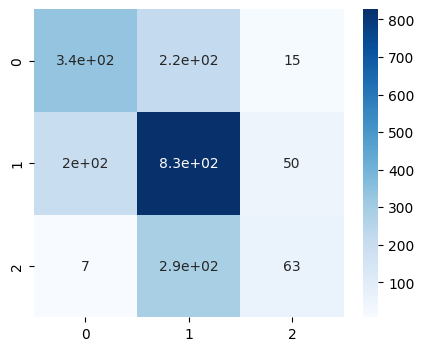


----------------------------

SVC  :
la précision du modéle test est:0.539
Classification report sur le test : 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       566
           1       0.54      1.00      0.70      1078
           2       0.00      0.00      0.00       356

    accuracy                           0.54      2000
   macro avg       0.18      0.33      0.23      2000
weighted avg       0.29      0.54      0.38      2000



/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kiki-wiwi/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this 

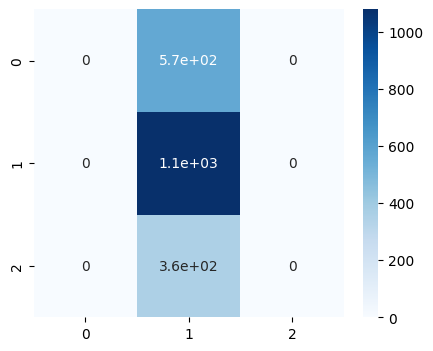


----------------------------

RandomForestClassifier :
la précision du modéle test est:0.7265
Classification report sur le test : 
               precision    recall  f1-score   support

           0       0.70      0.70      0.70       566
           1       0.77      0.76      0.76      1078
           2       0.64      0.67      0.65       356

    accuracy                           0.73      2000
   macro avg       0.70      0.71      0.71      2000
weighted avg       0.73      0.73      0.73      2000



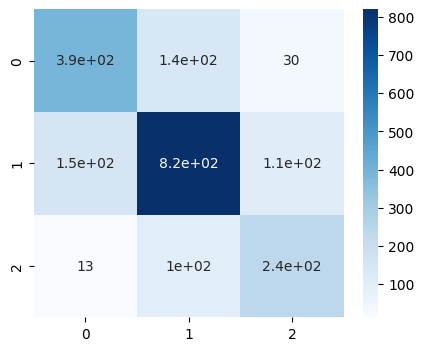


----------------------------

GradientBoostingClassifier :
la précision du modéle test est:0.7145
Classification report sur le test : 
               precision    recall  f1-score   support

           0       0.70      0.67      0.68       566
           1       0.76      0.75      0.76      1078
           2       0.61      0.68      0.64       356

    accuracy                           0.71      2000
   macro avg       0.69      0.70      0.69      2000
weighted avg       0.72      0.71      0.72      2000



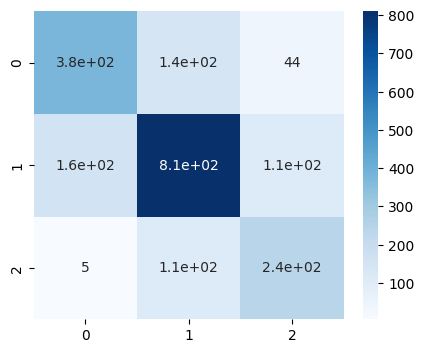


----------------------------

AdaBoostClassifier :
la précision du modéle test est:0.6635
Classification report sur le test : 
               precision    recall  f1-score   support

           0       0.64      0.58      0.61       566
           1       0.71      0.71      0.71      1078
           2       0.58      0.65      0.61       356

    accuracy                           0.66      2000
   macro avg       0.64      0.65      0.64      2000
weighted avg       0.66      0.66      0.66      2000



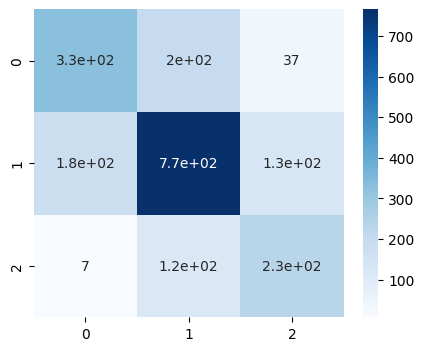


----------------------------

XGBClassifier :
la précision du modéle test est:0.7225
Classification report sur le test : 
               precision    recall  f1-score   support

           0       0.70      0.69      0.70       566
           1       0.77      0.77      0.77      1078
           2       0.62      0.64      0.63       356

    accuracy                           0.72      2000
   macro avg       0.70      0.70      0.70      2000
weighted avg       0.72      0.72      0.72      2000



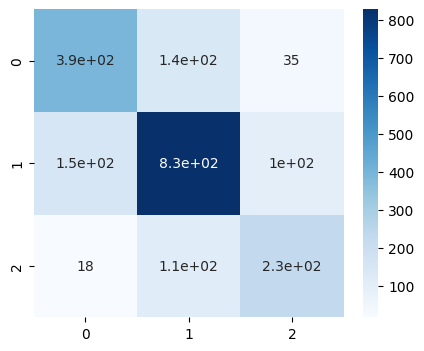


----------------------------

KNeighborsClassifier :
la précision du modéle test est:0.579
Classification report sur le test : 
               precision    recall  f1-score   support

           0       0.56      0.61      0.59       566
           1       0.63      0.67      0.65      1078
           2       0.38      0.26      0.31       356

    accuracy                           0.58      2000
   macro avg       0.53      0.51      0.51      2000
weighted avg       0.57      0.58      0.57      2000



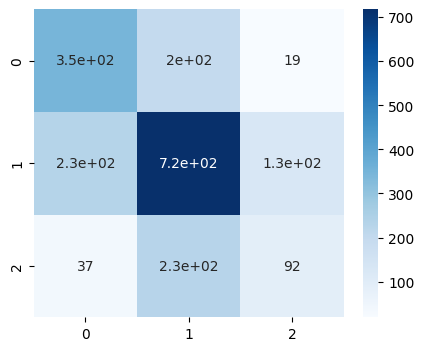


----------------------------



In [104]:
train_test_eval(models,X_2_train, X_2_test, y_train, y_test)        
    

# Application 

In [105]:
# Appliquer Random Forest 
rf = RandomForestClassifier()

rf.fit(X_2_train, y_train)

RandomForestClassifier()

In [107]:
y_pred= rf.predict(X_2_test)
y_pred_train= rf.predict(X_2_train)

In [108]:
print("f1 score sur le test : ", f1_score(y_test, y_pred, average='micro'))
print('\n----------------------------\n')
print("Classification report sur le test : \n", classification_report(y_test, y_pred))

f1 score sur le test :  0.728

----------------------------

Classification report sur le test : 
               precision    recall  f1-score   support

           0       0.70      0.70      0.70       566
           1       0.77      0.76      0.77      1078
           2       0.64      0.67      0.66       356

    accuracy                           0.73      2000
   macro avg       0.71      0.71      0.71      2000
weighted avg       0.73      0.73      0.73      2000



In [109]:
# Enregistrer le modéle 
pickle.dump(rf, open('model.pkl', 'wb'))